# Addendum - KNN
This file uses the KNN class as implemented in the homework instead of the library for comparison's sake.

In [1]:
%run preprocessing_lean.ipynb
%run visuals.ipynb

In [2]:
def euclidean_distance(x: np.ndarray, Y: np.ndarray) -> np.ndarray:
    return np.sqrt(np.sum((x-Y) ** 2, axis=1))

In [3]:
def accuracy(y: np.ndarray, y_hat: np.ndarray) -> float:
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)

    return np.sum((y == y_hat)) / len(y)

In [5]:
class KNearestNeighbors():
    """
        Attributes:
            k: Number of nearest neighbors

            distance_measure: A python function reference which will compute a valid distance measure

            X: The training input features

            y: The training targets/labels
    """
    def __init__(self, k: int, distance_measure):
        self.k = k
        self.distance_measure = distance_measure
        self.X: np.ndarray = None
        self.y: np.ndarray = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self.X, self.y = X, y

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_hats: list = []
        for sample in X:
            dist = self.distance_measure(sample, self.X)
            k_nearest = np.argsort(dist)[:self.k]
            nearest_labels = np.take(self.y, k_nearest)
            frequencies = np.bincount(nearest_labels)
            y_hats.append(np.argmax(frequencies))
        y_hats = np.array(y_hats)
        return y_hats

,Dataset,Accuracy
0,Training,0.964514
1,Validation,0.962329
2,Test,0.963069


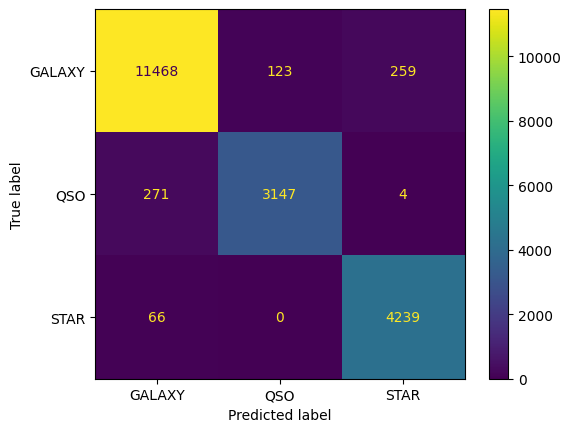

In [7]:
model = KNearestNeighbors(k=10, distance_measure=euclidean_distance)
model.fit(X_trn, y_trn)
generate_statistics(model.predict)